主要介绍线性回归
线性回归的主要组成是权重矩阵,而权重矩阵是大量的数据所训练或者说打磨而出
通过得到的特征矩阵对往后的相同格式的数据进行预测,这就是线性回归

定义特征矩阵X.shape()=n*d
定义标签y为n*1
定义权重矩阵W为d*1
^y为预测值为n*1
^y=X*W

标准方程求损失函数最小值
costfunction(W)=||y-X*W||^2
||y-X*W||^2==sum( {y[i]-X[i] *W}^2,i=1..n)=
对costfunction的W进行求导,求导值为0时,即为costfunction的最小值之处
f(W)=sum( {y[i]-X[i] *W}^2,i=1..n)
f'(W)=sum([ (y[i]-X[i] *W)^2]',i=1..n)
f'(W)=sum([ (y[i]- sum(X[i][j] *W[j],j=1..d) )^2]',i=1..n)
将所有的求和项展开
对W进行求导并求和
最后的导数式子为 X^T*X *W-X^T *y
将这个式子设置为0,那么就求得
X'*X *W=X' *y
W=(X'*X)^-1 *X' *y
特征矩阵为这个时,损失函数就是最小

小批量随机梯度下降
用所有数据中的几个,视为一小块整体
以这块整体的数据进行求导计算,得到小块的梯度下降值
再除以块内所含有的样本以及学习率step函数
作为权重或者偏置项的更新值
W=W-step/m*sum(X[i](X[i]*W+b-y),i=x..x+m)
b=b-step/m*sum( (X[i] *W+b-y),i=x..x+m)

其中step是学习率,m为小样本的样本个数,

In [2]:
import torch
from d2l import torch as d2l
%matplotlib inline
import math
import time
import numpy as np

In [3]:
n=10000
a=torch.ones(n)
b=torch.ones(n)

In [4]:
class Timer:  #@save
    """记录多次运行时间。"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器。"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中。"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间。"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和。"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间。"""
        return np.array(self.times).cumsum().tolist()

In [5]:
c=torch.zeros(n)
timer=Timer()
for i in range(n):
    c[i]=a[i]+b[i]
f'{timer.stop():.5f} sec'

'0.19950 sec'

In [6]:
timer.start()
d=a+b
f'{timer.stop():.5f} sec'

'0.00097 sec'

正态分布与平方损失
p(x)=1/sqrt(2 * pi * sigma ** 2) *exp((x-mu) ** 2/-2 *sigma * *2)

In [7]:
def normal(x,mu,sigma):
    return 1/math.sqrt(2*math.pi*sigma**2)*np.exp(-0.5*(x-mu)**2/sigma**2)
    #注意在涉及向量运算时,要记得用numpy库的函数,而不是math库的函数

<class 'numpy.ndarray'>


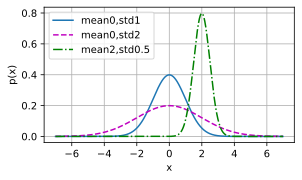

In [10]:
x=np.arange(-7,7,0.01)
params=[(0,1),(0,2),(2,0.5)]
print(type(normal(x,0,1)))
d2l.plot(x,[normal(x,mu,sigma) for mu,sigma in params],xlabel='x',ylabel='p(x)',figsize=(4.5,2.5),legend=[f'mean{mu},std{sigma}' for mu,sigma in params])


假设预测值和真实标签之间服从一下关系
y=x*W+b+thate theta~正态分布,此处的x是一个1*d的样本

p(y|x)=1/math.sqrt(2*sigma **2)*exp(-0.5*(y-x^T*w+b-y)/sigma **2)

根据最大似然的方,此处的X为整体的数据,shape为n*d
p(y|X)=p(y|x[1])*...*p(y|x[i])*...*p(y|x[n])
当p(y|X)越大,证明w和b的质量越好
当-log p(y|X)越小时,也能取得相同的效果
-log p(y|X)=sum(0.5*log(2*pi*sigma**2)+0.5*(y[i]-X[i]^T*w-b)/sigma**2, i=1..n)

因为0.5*log(2*pi*sigma**2)这一项不与w和b有关
只需令sum((y[i]-X[i]^T*w-b)/sigma**2, i=1..n)最小即可
而这部分也与均方误差损失函数等价
所以均方误差损失损失函数和极大似然估计在线性回归问题里是等价的

In [9]:
#---------------------------------------------------------------------------------------------